In [1]:
import numpy as np
import qiskit as q
from qiskit import *
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
import pandas as pd
from qiskit.tools.jupyter import *
from scipy.optimize import minimize
from sklearn.preprocessing import Normalizer

from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

from qiskit.aqua.components.multiclass_extensions import AllPairs

#import nbimporter
#from Test1 import T1Copy1
#import import_ipynb
#import T1Copy1

backend = BasicAer.get_backend('qasm_simulator')

# Import & Clean

We use as an example the iris dataset. This dataset is composed of 4 variables labelled -1 or 1. We only keep as a feature the 2 first columns and transform the labels as 0 and 1. The data are then padded with constant values and renormalized to have a unitary vector. We use a special routine to encode the data in the quantum circuit. Given a unitary vector of dimension 4, we extract 5 angles with the function get_angles. These angles will serve as arguments to the encoding quantum circuit

In [ ]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20, 
    test_size=10, 
    n=feature_dim, 
    gap=0.3, 
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [ ]:
datapoints

In [2]:
 featuremap_circ = ZFeatureMap(4, reps=1)



In [3]:
print(featuremap_circ)

     ┌───┐┌──────────────┐
q_0: ┤ H ├┤ U1(2.0*x[0]) ├
     ├───┤├──────────────┤
q_1: ┤ H ├┤ U1(2.0*x[1]) ├
     ├───┤├──────────────┤
q_2: ┤ H ├┤ U1(2.0*x[2]) ├
     ├───┤├──────────────┤
q_3: ┤ H ├┤ U1(2.0*x[3]) ├
     └───┘└──────────────┘


In [4]:
 from sklearn.datasets import load_iris
from sklearn.utils import shuffle # import Iris data set from sklearn.utils import shuffle

from sklearn.preprocessing import normalize # import a normilisation function
np.random.seed(42) # set a seed

In [5]:
x, Y = load_iris().data, load_iris().target
x, Y = shuffle(x,Y)
# take the first x
x = x[:1000] 
Y = Y[:1000]

print(x, Y)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.

In [6]:
# normalize the data
data = normalize(x) 
print(data)

[[0.73659895 0.33811099 0.56754345 0.14490471]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.70600618 0.2383917  0.63265489 0.21088496]
 [0.73350949 0.35452959 0.55013212 0.18337737]
 [0.76467269 0.31486523 0.53976896 0.15743261]
 [0.82225028 0.51771314 0.22840286 0.06090743]
 [0.75911707 0.3931142  0.48800383 0.17622361]
 [0.73337886 0.32948905 0.54206264 0.24445962]
 [0.76444238 0.27125375 0.55483721 0.18494574]
 [0.76434981 0.35581802 0.51395936 0.15814134]
 [0.71562645 0.3523084  0.56149152 0.22019275]
 [0.82307218 0.51442011 0.24006272 0.01714734]
 [0.82699754 0.52627116 0.19547215 0.03007264]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.72634846 0.38046824 0.54187901 0.18446945]
 [0.68619022 0.31670318 0.61229281 0.232249  ]
 [0.76185188 0.34011245 0.53057542 0.14964948]
 [0.72232962 0.35482858 0.57026022 0.16474184]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]
 [0.79524064 0.54144043 0.27072022 0.03384003]
 [0.71171214 

In [ ]:
#circ_data0 = featuremap_circ.assign_parameters(data[0]/2)

In [ ]:
#circ_data1 = circ_data0.combine(featuremap_circ.assign_parameters(data[1]/2))

In [ ]:
#print(circ_data0)
#print(circ_data1)

In [23]:
n = 4
FMap = QuantumCircuit(n,name='FMap')
#circ_data0 = featuremap_circ.assign_parameters(data[0]/2)

circ_data0=featuremap_circ.multiclass_extension = AllPairs()
FMap = circ_data0

# print
print(FMap)

In [25]:
# combine the featuremap circuit with assigned parameters of the second data␣ 􏰀→point
circ_data1 = circ_data0.multiclass_extension = AllPairs(featuremap_circ.assign_parameters(data[1]/2)) 
#circ_data1=featuremap_circ.multiclass_extension = AllPairs()

FMap = circ_data1
print(FMap)


circ = QuantumCircuit(4)

for i in range(len(data)):
    circ = circ.combine(featuremap_circ.assign_parameters(data[i]/2))
print(circ)

FMap = circ


TypeError: 'AllPairs' object is not callable

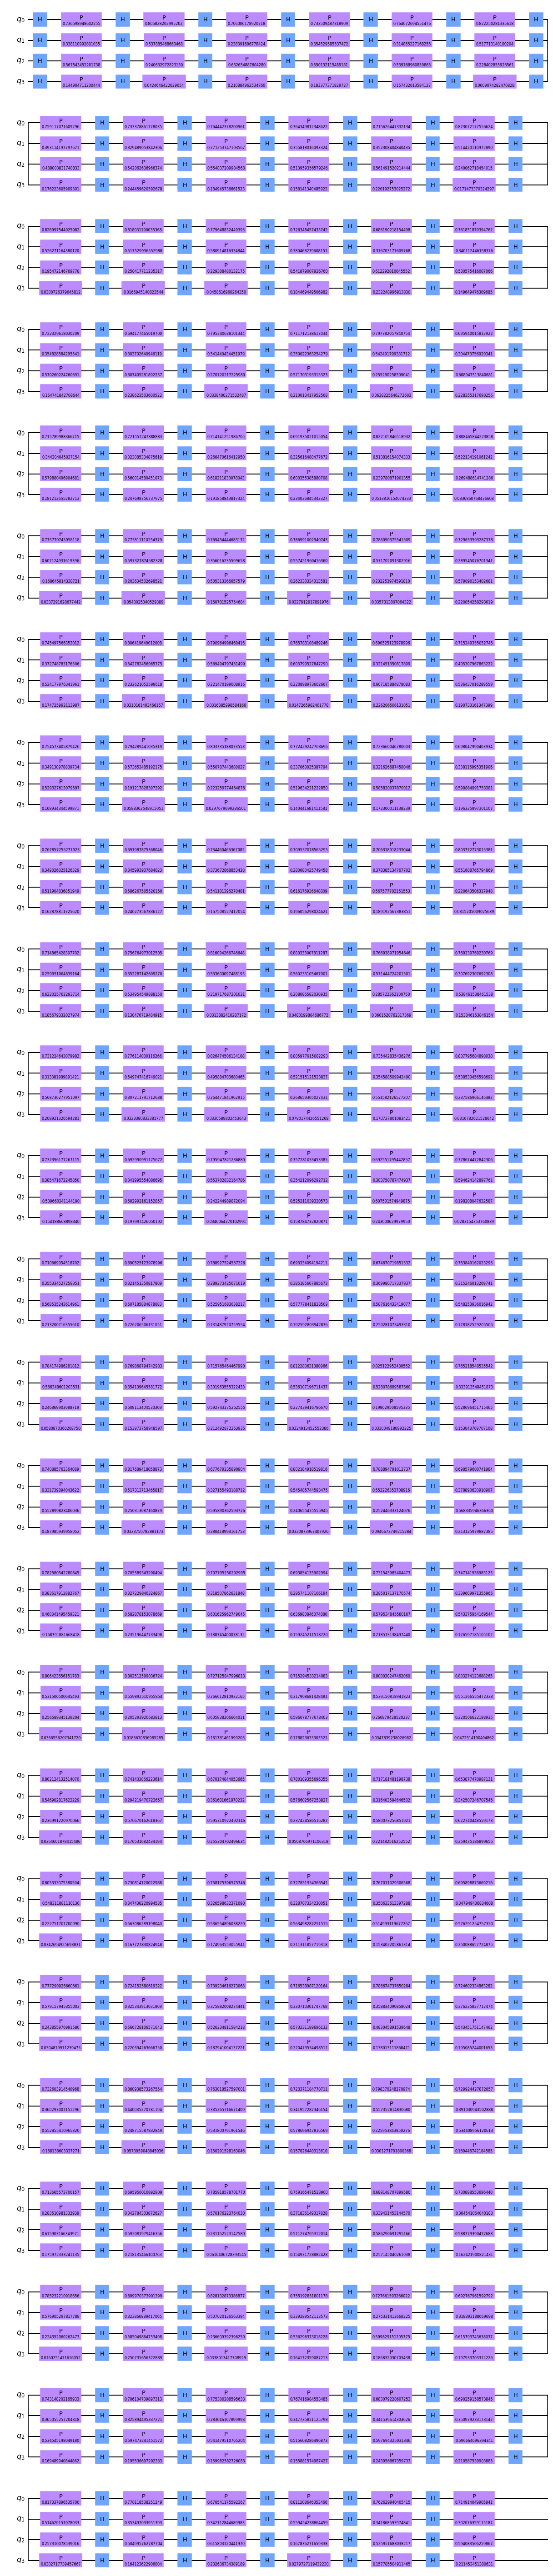

In [20]:
circ.draw(output="mpl")

In [9]:

FMap.to_gate()

In [10]:
q       = QuantumRegister(9)
c       = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)

In [11]:
circuit.append(FMap,[0,1,2,3])

In [7]:
# assign data to circuit parameters
#circ_data0 = featuremap_circ.assign_parameters(data[0]/2)

# print
#print(circ_data0)

     ┌───┐┌───────────────────────┐
q_0: ┤ H ├┤ U1(0.736598948602255) ├
     ├───┤├───────────────────────┤
q_1: ┤ H ├┤ U1(0.338110992801035) ├
     ├───┤├───────────────────────┤
q_2: ┤ H ├┤ U1(0.567543452201738) ├
     ├───┤├───────────────────────┤
q_3: ┤ H ├┤ U1(0.144904711200444) ├
     └───┘└───────────────────────┘


In [8]:
# combine the featuremap circuit with assigned parameters of the second data␣ 􏰀→point
#circ_data1 = circ_data0.combine(featuremap_circ.assign_parameters(data[1]/2)) 
#print(circ_data1)

     ┌───┐┌──────────────────────┐┌───┐ ┌──────────────────────┐
q_0: ┤ H ├┤ P(0.736598948602255) ├┤ H ├─┤ P(0.806828202995202) ├
     ├───┤├──────────────────────┤├───┤ ├──────────────────────┤
q_1: ┤ H ├┤ P(0.338110992801035) ├┤ H ├─┤ P(0.537885468663468) ├
     ├───┤├──────────────────────┤├───┤ ├──────────────────────┤
q_2: ┤ H ├┤ P(0.567543452201738) ├┤ H ├─┤ P(0.240632972823130) ├
     ├───┤├──────────────────────┤├───┤┌┴──────────────────────┤
q_3: ┤ H ├┤ P(0.144904711200444) ├┤ H ├┤ P(0.0424646422629054) ├
     └───┘└──────────────────────┘└───┘└───────────────────────┘


In [11]:
# More generally, ...
#circ = QuantumCircuit(4)

#for i in range(len(data)):
#    circ = circ.combine(featuremap_circ.assign_parameters(data[i]/2))
#print(circ)



     ┌───┐┌──────────────────────┐┌───┐ ┌──────────────────────┐┌───┐»
q_0: ┤ H ├┤ P(0.736598948602255) ├┤ H ├─┤ P(0.806828202995202) ├┤ H ├»
     ├───┤├──────────────────────┤├───┤ ├──────────────────────┤├───┤»
q_1: ┤ H ├┤ P(0.338110992801035) ├┤ H ├─┤ P(0.537885468663468) ├┤ H ├»
     ├───┤├──────────────────────┤├───┤ ├──────────────────────┤├───┤»
q_2: ┤ H ├┤ P(0.567543452201738) ├┤ H ├─┤ P(0.240632972823130) ├┤ H ├»
     ├───┤├──────────────────────┤├───┤┌┴──────────────────────┤├───┤»
q_3: ┤ H ├┤ P(0.144904711200444) ├┤ H ├┤ P(0.0424646422629054) ├┤ H ├»
     └───┘└──────────────────────┘└───┘└───────────────────────┘└───┘»
«     ┌──────────────────────┐┌───┐┌──────────────────────┐┌───┐»
«q_0: ┤ P(0.706006178920718) ├┤ H ├┤ P(0.733509487318909) ├┤ H ├»
«     ├──────────────────────┤├───┤├──────────────────────┤├───┤»
«q_1: ┤ P(0.238391696778424) ├┤ H ├┤ P(0.354529585537472) ├┤ H ├»
«     ├──────────────────────┤├───┤├──────────────────────┤├───┤»
«q_2: ┤ P(0.632654887604280) ├┤

In [12]:
#circ = QuantumCircuit(9)

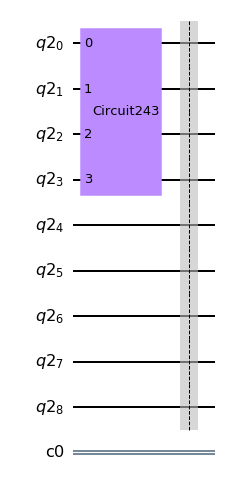

In [12]:
circuit.barrier()


circuit.draw(output="mpl")

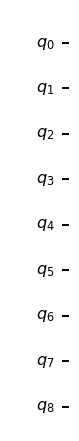

In [13]:
#circ.draw(output="mpl")

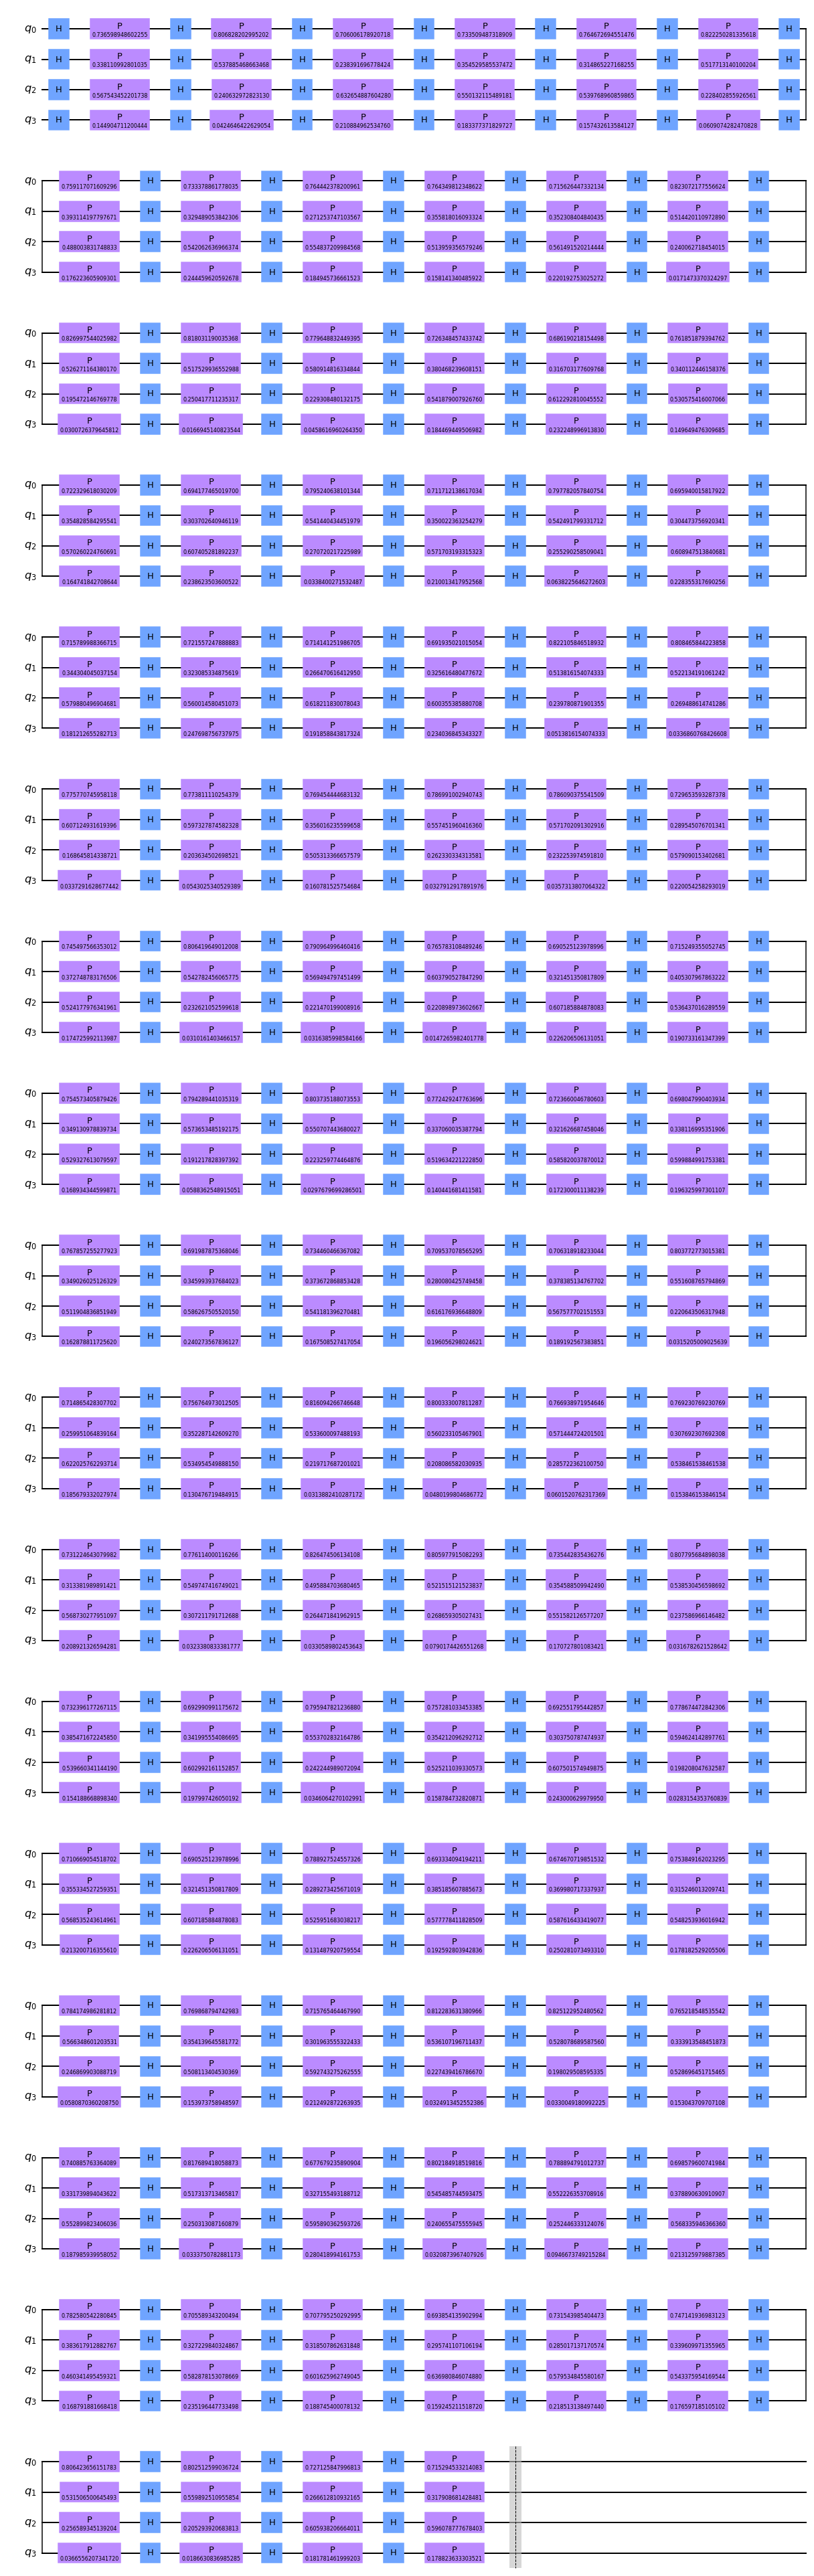

In [11]:
#circ.barrier()
#circ.draw(output="mpl")

In [16]:
#q       = QuantumRegister(9)
#c       = ClassicalRegister(1)
#circuit = QuantumCircuit(q,c)

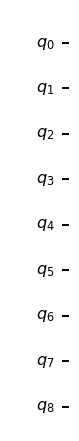

In [17]:
#circuit.draw(output="mpl")

# kNN Algorhim

Encapsulated in a subroutine to save circuit space

In [13]:
n = 9
kNN = QuantumCircuit(n,name='kNN')

kNN.h(0) 
kNN.h(1)

kNN.id(4)
kNN.id(5)
kNN.id(6)
kNN.id(7)
kNN.id(8)

kNN.x(3)#The NOT gate, also known as the Pauli X gate, flips the  state to , and vice versa. 
kNN.cx(1, 3)

kNN.id(4)
kNN.cx(0, 2)
kNN.id(5)
kNN.id(6)
kNN.id(7)
kNN.id(8)

kNN.id(3)
kNN.id(4)
kNN.id(5)
kNN.id(5)
kNN.id(7)
kNN.id(8)



####

kNN.id(0)
kNN.id(1)

kNN.x(2)
kNN.x(3)
kNN.x(4)

kNN.id(5)

kNN.x(6)

kNN.id(7)
kNN.id(8)

#kNN.barrier()


###


kNN.ccx(2, 3, 4)

kNN.id(6)
kNN.id(7)
kNN.id(8)


kNN.ccx(2, 5, 6)

kNN.id(7)
kNN.id(8)


kNN.ccx(2, 6, 5)


kNN.id(7)
kNN.id(8)


kNN.x(6)
          
#circuit.id(qreg_q[2])



kNN.id(5)
kNN.id(7)
kNN.id(8)

#kNN.barrier

######

kNN.ccx(3, 5, 4)



kNN.id(6)
kNN.id(7)
kNN.id(8)



kNN.ccx(3, 5, 6)

kNN.id(7)
kNN.id(8)

kNN.ccx(3, 6, 5)

kNN.id(7)
kNN.id(8)



kNN.x(6)


#circuit.id(qreg_q[3])
#circuit.id(qreg_q[4])


#circuit.id(qreg_q[5])
kNN.id(7)
kNN.id(8)


#####
#kNN.barrier()
kNN.x(4)
kNN.x(5)
kNN.x(6)

kNN.ccx(4, 5,7)
kNN.ccx(6, 7, 8)

kNN.x(8)

kNN.to_gate()

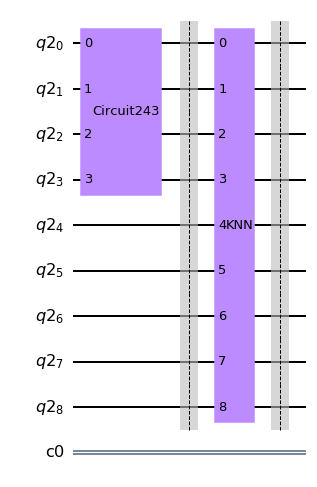

In [14]:
circuit.append(kNN,[0,1,2,3,4,5,6,7,8])
circuit.barrier()


circuit.draw(output="mpl")

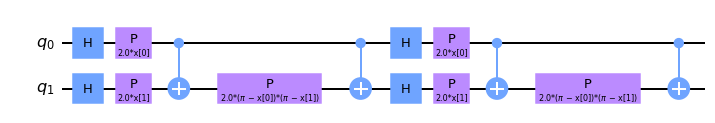

In [6]:
#circuit.append(kNN,[0,1,2,3,4,5,6,7,8])
#circuit.barrier()

#seed = 10598

#feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')

#circuit=feature_map

#circuit.draw(output="mpl")


In [8]:
#n = 2
#FMap = QuantumCircuit(n,name='FMap')

#seed = 10598

#FMap = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')





In [9]:
#FMap.to_gate()

In [10]:
#qr = QuantumRegister(9)
#cr = ClassicalRegister(9)
#circuit = QuantumCircuit(qr, cr)




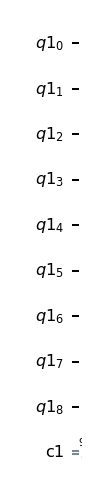

In [11]:

#circuit.draw(output="mpl")

In [12]:
#circuit.append(FMap,[0,1])

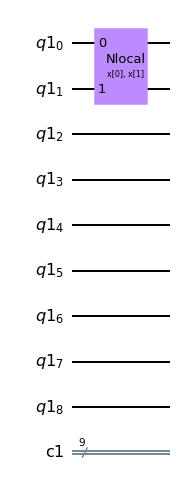

In [13]:
#circuit.draw(output="mpl")

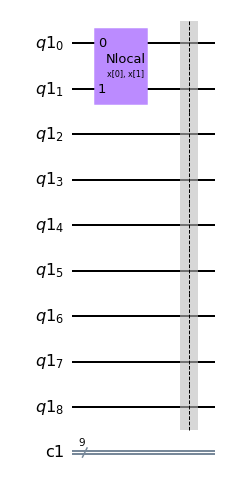

In [14]:
#circuit.barrier()
#circuit.draw(output="mpl")

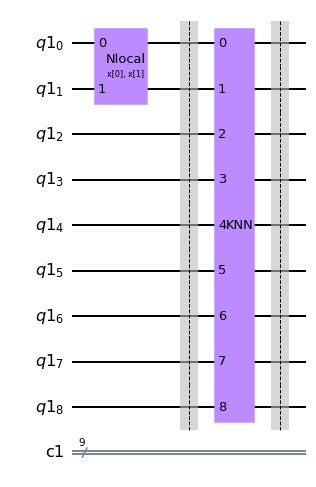

In [15]:
#circuit.append(kNN,[0,1,2,3,4,5,6,7,8])
#circuit.barrier()


#circuit.draw(output="mpl")



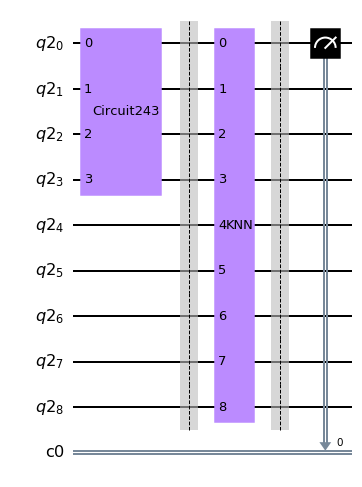

In [15]:
circuit.measure(0,c)
circuit.draw(output="mpl")

# Testing

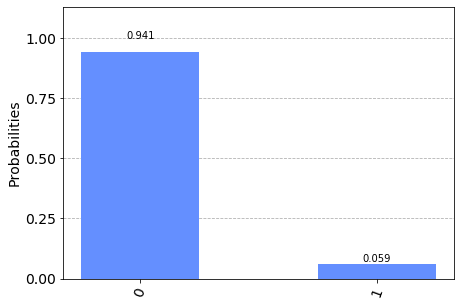

In [16]:
from qiskit.visualization import plot_histogram
emulator = Aer.get_backend('qasm_simulator')

job = execute( circuit, emulator, shots=8192 )

hist = job.result().get_counts()
plot_histogram(hist)

In [23]:
from qiskit import IBMQ
IBMQ.active_account()
IBMQ.save_account('b35ee002c40b58f68333b4dc663e57f118764a66394591bc1270dd258ede51076296505fe28203f55935798b133fda9814350ca6b975b3899b38cbda9a034725', overwrite=True)

IBMQ.load_account()
provider= IBMQ.get_provider(hub='ibm-q')
real_device = provider.get_backend('ibmq_16_melbourne')

/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [ ]:
job = execute(circuit, backend = real_device, shots=8192)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

6025d11cb3c67f92c0f3bddf
Job Status: job is queued (None)  

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

# Preparing the circuit --> in progress, bloch sphere 

In [4]:
def u_gate(param, circuit, target):
    '''Return the quantum circuit with u3 gate applied on qubit target with param as an iterable'''
    circuit.u3(param[0],param[1],param[2],target)
    return circuit

def cu_gate(param, circuit, control, target):
    '''Return the quantum circuit with cu3 gate applied on qubit target with param as an iterable wrt control'''
    circuit.cu3(param[0],param[1],param[2], control, target)
    return circuit

def circuit_block(param, circuit, target, same_order_x=True):
    '''Return the block applied on qubits target from the circuit circuit
    - param : array parameters for the two u gate
    - target : array of integer the numero of qubits for the u gates to be applied
    - if same_order_x == True : cx(target[0], target[1])
    else: cx(target[1], target[0])'''
    circuit = u_gate(param[0], circuit, target[0])
    circuit = u_gate(param[1], circuit, target[1])
    if same_order_x:
        circuit.cx(target[0], target[1])
    else:
        circuit.cx(target[1], target[0])
    return circuit

def c_circuit_block(param, circuit, control, target, same_order_x=True):
    '''Return the controlled block applied on qubits target from the circuit circuit
    - param : array parameters for the two u gate
    - target : array of integer the numero of qubits for the u gates to be applied
    - if same_order_x == True : cx(target[0], target[1])
    else: cx(target[1], target[0])'''
    circuit = cu_gate(param[0], circuit, control, target[0])
    circuit = cu_gate(param[1], circuit, control, target[1])
    if same_order_x:
        circuit.ccx(control, target[0], target[1])
    else:
        circuit.ccx(control, target[1], target[0])
    return circuit

def create_circuit(param, circuit, target):
    order = True
    for i in range(param.shape[0]):
        circuit = circuit_block(param[i], circuit, target, order)
        order = not order
    return circuit

def create_c_circuit(param, circuit, control, target):
    order = True
    for i in range(param.shape[0]):
        circuit = c_circuit_block(param[i], circuit, control, target, order)
        order = not order 
    return circuit

/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  This is separate from the ipykernel package so we can avoid doing imports until


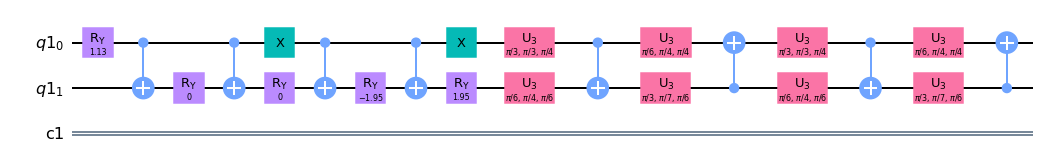

In [5]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0])
ang = get_angles(x)

params = np.array([[[np.pi/3,np.pi/3,np.pi/4],
                    [np.pi/6,np.pi/4,np.pi/6]],
                    [[np.pi/6,np.pi/4,np.pi/4],
                    [np.pi/3,np.pi/7,np.pi/6]],
                    [[np.pi/3,np.pi/3,np.pi/4],
                    [np.pi/6,np.pi/4,np.pi/6]],
                    [[np.pi/6,np.pi/4,np.pi/4],
                    [np.pi/3,np.pi/7,np.pi/6]]])

q       = QuantumRegister(2)
c       = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit = statepreparation(ang, circuit, [0,1])

circuit = create_circuit(params, circuit, [0,1])

circuit.draw(output='mpl')